

**Write a function that takes as input an image I, rotates it by an angle θ1 and horizontally skews it by an angle, θ2. Write the matrix formulation for image rotation R(.) and skewing S(.). Define all the variables. Note that the origin of the coordinate system of the programming environment you use might be different from the one shown in the lectures.**


In [2]:
pip install opencv-python

  Using cached opencv_python-4.8.1.78-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
Using cached opencv_python-4.8.1.78-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (61.7 MB)
Note: you may need to restart the kernel to use updated packages.


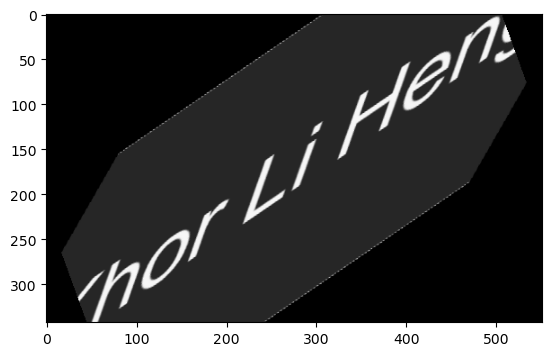

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def bilinear_interpolation(image, new_x, new_y):
    height, width = image.shape[:2]
    if 0 <= new_x < width - 1 and 0 <= new_y < height - 1:
        x1, y1 = int(new_x), int(new_y)
        x2, y2 = x1 + 1, y1 + 1
        dx, dy = new_x - x1, new_y - y1

        interpolated_value = (
            (1 - dx) * (1 - dy) * image[y1, x1]
            + dx * (1 - dy) * image[y1, x2]
            + (1 - dx) * dy * image[y2, x1]
            + dx * dy * image[y2, x2]
        )
        return interpolated_value
    else:
        return 0

def rotate_image(image, rotation_angle_deg):
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    rotation_angle_rad = np.deg2rad(rotation_angle_deg)
    rotation_matrix = np.array([[np.cos(rotation_angle_rad), -np.sin(rotation_angle_rad), 0],
                                [np.sin(rotation_angle_rad), np.cos(rotation_angle_rad), 0],
                                [0, 0, 1]], dtype=np.float32)
    rotated_image = np.zeros_like(image)

    for y in range(height):
        for x in range(width):
            new_coords = np.dot(rotation_matrix, [x - center[0], y - center[1], 1]) + [center[0], center[1], 0]
            new_x, new_y = new_coords[0], new_coords[1]
            rotated_image[y, x] = bilinear_interpolation(image, new_x, new_y)

    return rotated_image

def skew_image(image, skew_angle_deg):
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    skew_angle_rad = np.deg2rad(skew_angle_deg)
    skew_matrix = np.array([[1, np.tan(skew_angle_rad), 0],
                            [0, 1, 0],
                            [0, 0, 1]], dtype=np.float32)
    skewed_image = np.zeros_like(image)

    for y in range(height):
        for x in range(width):
            new_coords = np.dot(skew_matrix, [x - center[0], y - center[1], 1]) + [center[0], center[1], 0]
            new_x, new_y = new_coords[0], new_coords[1]
            skewed_image[y, x] = bilinear_interpolation(image, new_x, new_y)

    return skewed_image

# Load an image
image = cv2.imread("KhorLiHeng_img.png")

# Define rotation and skew angles (in degrees)
rotation_angle_deg =20
skew_angle_deg = 50

# Apply rotation and skewing separately
skewed_image = skew_image(rotated_image, skew_angle_deg)
rotated_image = rotate_image(skewed_image, rotation_angle_deg)

# Display the results
plt.imshow(rotated_image)
